In [25]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
from scipy.stats import ttest_ind
from scipy.stats import linregress

In [52]:
final_datafile = "final_output_ryan.csv"

final_data = pd.read_csv(final_datafile)

In [145]:
final_data2 = final_data[['Name','Inspection_Score','Inspection_Grade','Rating','Reviews','Price','Category']]
final_data2.head()


,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
0,El Tequilense Restaurant,94,A,4.0,42,$,Mexican
1,Seafood Express,91,A,4.0,266,$,Seafood
2,Pho Rowland Restaurant,93,A,4.0,408,$,Vietnamese
3,Jino's Pars,91,A,4.0,477,$$,Persian/Iranian
4,Pie-Not The Aussie Style Bakery,94,A,4.0,826,$,Bakeries


Text(0,0.5,'Number of Reviews')

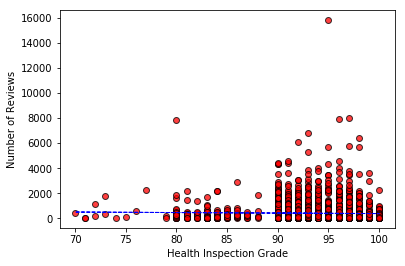

In [151]:
plt.scatter(final_data2['Inspection_Score'], final_data2['Reviews'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
(slope1, intercept1, _, _, _) = linregress(final_data2['Inspection_Score'], final_data2['Reviews'])
fit1 = slope1 * final_data2['Inspection_Score'] + intercept1
plt.plot(final_data2['Inspection_Score'], fit1, "b--", linewidth=1)
plt.xlabel("Health Inspection Grade")
plt.ylabel("Number of Reviews")
plt.savefig("../Images/lineConfig.png")


In [65]:
final_data2.Inspection_Grade.value_counts()

A    3374
B     171
C      13
Name: Inspection_Grade, dtype: int64

In [66]:
final_data2[final_data2['Reviews']>6000]

,Name,Inspection_Score,Inspection_Grade,Rating,Reviews,Price,Category
266,Porto's Bakery & Cafe,97,A,4.5,7968,$,Bakeries
462,Porto's Bakery & Cafe,92,A,4.5,6115,$,Bakeries
1081,Daikokuya Little Tokyo,80,B,4.0,7858,$$,Ramen
1115,Wurstküche,96,A,4.0,7913,$$,Hot Dogs
1227,Bottega Louie,95,A,4.0,15795,$$,Italian
1258,Perch,98,A,4.0,6372,$$$,Lounges
1529,Pink's Hot Dogs,93,A,3.5,6826,$,Hot Dogs


In [138]:
#final_data.groupby(['Category'])
grouped_final_data = final_data2.groupby(['Category'])
groupby_category_sum = grouped_final_data.sum()['Reviews']
groupby_category_mean_yelp = grouped_final_data.mean()['Rating'] 
groupby_category_mean_health = grouped_final_data.mean()['Inspection_Score'] 
final_groupby = pd.DataFrame({"Rating": groupby_category_mean_yelp, "Reviews": groupby_category_sum, 
                              "Inspection_Score": groupby_category_mean_health})


In [141]:
top15_reviews = final_groupby.sort_values(['Reviews'],ascending=False).head(15)
top15_reviews

,Rating,Reviews,Inspection_Score
Category,,,
Mexican,3.714092,117407,93.501355
American (New),3.817391,91115,92.826087
Italian,3.959770,60293,93.367816
Japanese,3.849593,56782,92.829268
Bakeries,3.955357,52815,93.437500
Pizza,3.706061,51255,93.363636
Coffee & Tea,3.904762,47209,93.421769
Korean,3.986111,43958,92.180556
Burgers,3.610577,43630,93.403846


In [143]:
top15_inspection = final_groupby.sort_values(['Inspection_Score'],ascending=False).head(15)
top15_inspection

,Rating,Reviews,Inspection_Score
Category,,,
"Beer, Wine & Spirits",5.000,65,100.0
Home Decor,3.000,756,100.0
Skating Rinks,3.500,418,100.0
Acai Bowls,4.500,111,99.0
Dog Parks,3.000,119,99.0
Children's Museums,4.000,1373,99.0
Pet Adoption,5.000,61,99.0
Pretzels,3.000,44,99.0
Outlet Stores,3.500,1072,99.0


In [142]:
bottom15_inspection = final_groupby.sort_values(['Inspection_Score'],ascending=True).head(15)
bottom15_inspection

,Rating,Reviews,Inspection_Score
Category,,,
Floral Designers,3.000000,297,80.000000
Creperies,3.750000,418,85.000000
New Mexican Cuisine,4.000000,137,85.000000
Food Stands,4.500000,305,85.000000
Shanghainese,4.000000,2922,86.000000
Dim Sum,3.500000,4271,86.500000
Cantonese,3.500000,814,88.200000
Hot Pot,4.250000,197,88.500000
Buffets,3.071429,2010,88.857143


In [136]:
final_groupby["scaled_rating"] = ((final_groupby['Rating'] - final_groupby['Rating'].min()) / (final_groupby['Rating'].max() - final_groupby['Rating'].min())) *50
final_groupby.head()



,Rating,Reviews,Inspection_Score,scaled_rating
Category,,,,
Acai Bowls,4.5,111,99.0,43.75
Adult Entertainment,3.2,960,91.0,27.50
Airlines,3.0,87,93.0,25.00
Airport Lounges,4.0,121,92.0,37.50
Airport Terminals,2.5,215,97.5,18.75


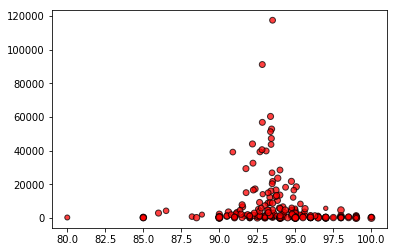

In [133]:
plt.scatter(final_groupby['Inspection_Score'], final_groupby['Reviews'], marker = "o", facecolors="red", edgecolors="black",
            s=final_groupby['scaled_rating'], alpha=0.75)

